In [1]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

CPU times: user 1.19 s, sys: 187 ms, total: 1.37 s
Wall time: 1.62 s


# BICCN MOp gene/ont

In [2]:
#Read in all the BICCN gene/ont data (non-permuted)
paths = glob.glob('../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/*.csv')
mop_df = pd.concat(pd.read_csv(p) for p in paths)
mop_df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
0,BICCN_mouse1,m1s1,puncta,1700022I11Rik,L23_IT,58,2.0,610.5,0.213000,1.853517,6.380835e-02,7.751502e-02
1,BICCN_mouse1,m1s1,puncta,1700022I11Rik,L5_IT,40,2.0,790.0,0.274000,2.588688,9.634233e-03,1.296670e-02
2,BICCN_mouse1,m1s1,puncta,1700022I11Rik,L6_IT,23,2.0,765.0,0.714000,4.245858,2.177581e-05,4.062884e-05
3,BICCN_mouse1,m1s1,puncta,1810046K07Rik,L23_IT,627,2.0,642.0,0.340000,11.957061,0.000000e+00,0.000000e+00
4,BICCN_mouse1,m1s1,puncta,1810046K07Rik,L56_NP,23,2.0,612.0,0.308000,2.550834,1.074654e-02,1.439459e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
4490,BICCN_mouse2,m2s1,central,Zfp804b,SMC,33,1.0,369.0,-0.045752,-0.126129,8.996298e-01,9.257771e-01
4491,BICCN_mouse2,m2s1,central,Zfp804b,Sncg,37,1.0,836.0,-0.016155,-0.301853,7.627643e-01,8.175073e-01
4492,BICCN_mouse2,m2s1,central,Zfp804b,Sst,128,1.0,749.5,0.122979,1.398485,1.619675e-01,2.331232e-01
4493,BICCN_mouse2,m2s1,central,Zfp804b,VLMC,65,1.0,357.0,-0.025295,-0.517141,6.050581e-01,6.871491e-01


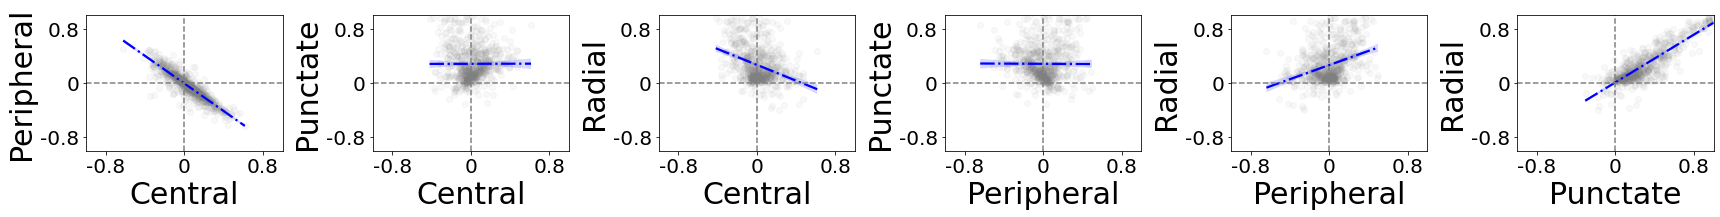

In [10]:
import itertools

pair_df = mop_df.pivot(
    index = ['experiment','gene','annotation'],
    columns = 'metric',
    values = 'med_score',
)

pair_df = pair_df.sample(1000)

metric_names = {
    'central':'Central',
    'periph':'Peripheral',
    'radial':'Radial',
    'puncta':'Punctate',
}

metric_pairs = itertools.combinations(pair_df.columns,2)

n = len(pair_df.columns)
num_plots = n*(n-1)//2

fig,axs = plt.subplots(
    figsize=(6*n,3),
    ncols=num_plots,
)

for ax,(c1,c2) in zip(axs,metric_pairs):
    sns.regplot(
        x = c1,
        y = c2,
        scatter_kws = {'alpha':0.05, 'color':'grey'},
        line_kws = {'color':'blue', 'linestyle':'-.'},
        data = pair_df,
        ax = ax,
    )
    ax.set_xlabel(metric_names[c1], fontsize=30)
    ax.set_ylabel(metric_names[c2], fontsize=30)
    ax.set_xticks([-0.8,0,0.8])
    ax.set_yticks([-0.8,0,0.8])
    ax.set_xticklabels([-0.8,0,0.8], fontsize=20)
    ax.set_yticklabels([-0.8,0,0.8], fontsize=20)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.axhline(0, linestyle='--', color='grey')
    ax.axvline(0, linestyle='--', color='grey')

plt.tight_layout()
plt.savefig('supplemental_figure_1_svgs/corr_between_metrics.svg')
plt.show()
plt.close()

In [28]:
sns.regplot?

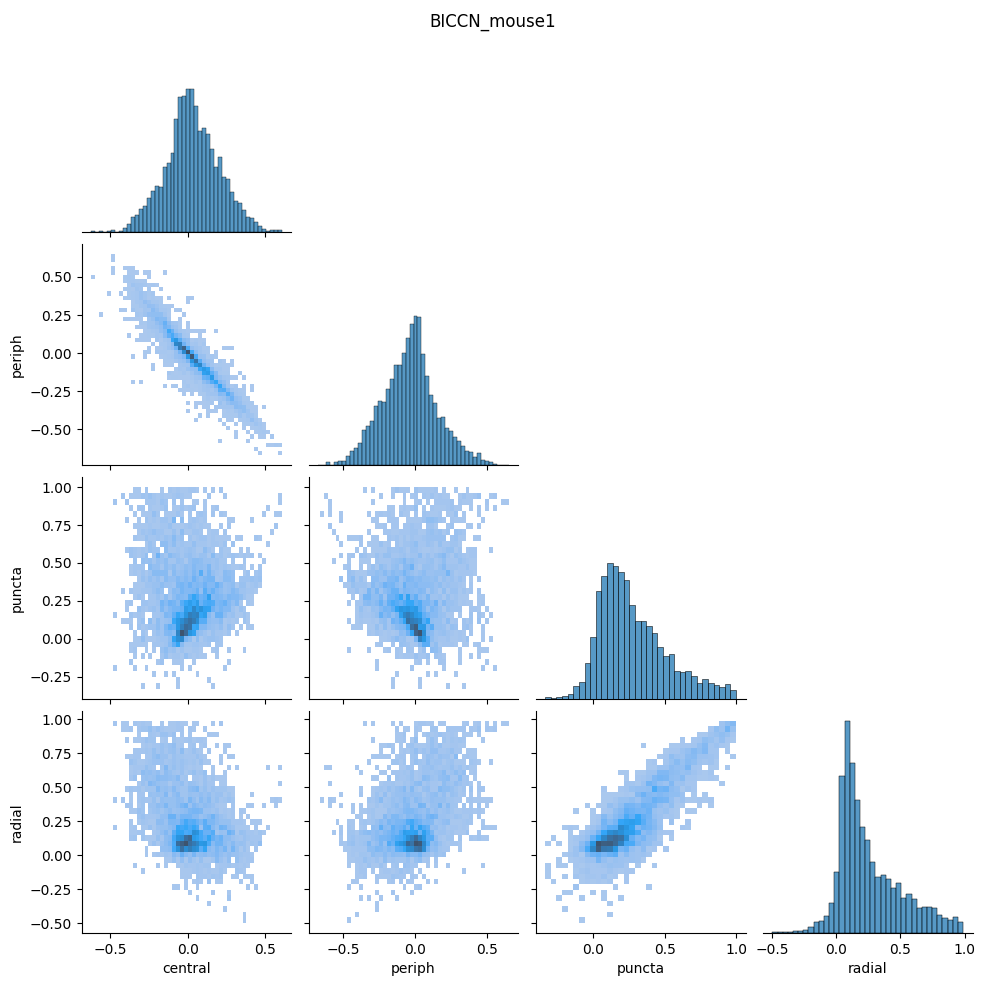

CPU times: user 3.01 s, sys: 75.8 ms, total: 3.09 s
Wall time: 3.14 s


In [4]:
%%time
#pairplot metrics against each other, separately per mouse
pair_df = mop_df.pivot(
    index = ['experiment','gene','annotation'],
    columns = 'metric',
    values = 'med_score',
).reset_index(level=0).reset_index(drop=True)

for exp,plot_df in pair_df.groupby('experiment'):
    sns.pairplot(data=plot_df, kind='hist', corner=True)
    plt.suptitle(f'{exp}')
    plt.savefig('supplemental_figure_1_svgs/corr_between_metrics.svg')
    plt.show()
    plt.close()
    
    break

# BICCN MOp gene/cell

In [57]:
#This is a large df!
#Read in all the BICCN gene/ont data (non-permuted)
paths = glob.glob('../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/*.csv')
mop_df = pd.concat(pd.read_csv(p) for p in paths)
mop_df

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance,experiment,sample
0,puncta,208216926404047031835800982290964847257,Endo,197,Cxcl14,3,-0.488000,0.334000,BICCN_mouse1,m1s1
1,puncta,208216926404047031835800982290964847257,Endo,197,Flt1,66,0.458000,0.334000,BICCN_mouse1,m1s1
2,puncta,208216926404047031835800982290964847257,Endo,197,Aqp4,2,-0.250000,0.334000,BICCN_mouse1,m1s1
3,puncta,208216926404047031835800982290964847257,Endo,197,Acta2,3,-0.848000,0.334000,BICCN_mouse1,m1s1
4,puncta,208216926404047031835800982290964847257,Endo,197,Timp3,17,0.566000,0.334000,BICCN_mouse1,m1s1
...,...,...,...,...,...,...,...,...,...,...
4669863,central,294934189382673171666904576213325444817,L5_IT,268,Tmem163,1,-0.303371,0.335830,BICCN_mouse2,m2s6
4669864,central,294934189382673171666904576213325444817,L5_IT,268,Tox,9,-0.198502,0.088846,BICCN_mouse2,m2s6
4669865,central,294934189382673171666904576213325444817,L5_IT,268,Trpc4,3,-0.820225,0.199989,BICCN_mouse2,m2s6
4669866,central,294934189382673171666904576213325444817,L5_IT,268,Wipf3,14,-0.033708,0.055909,BICCN_mouse2,m2s6


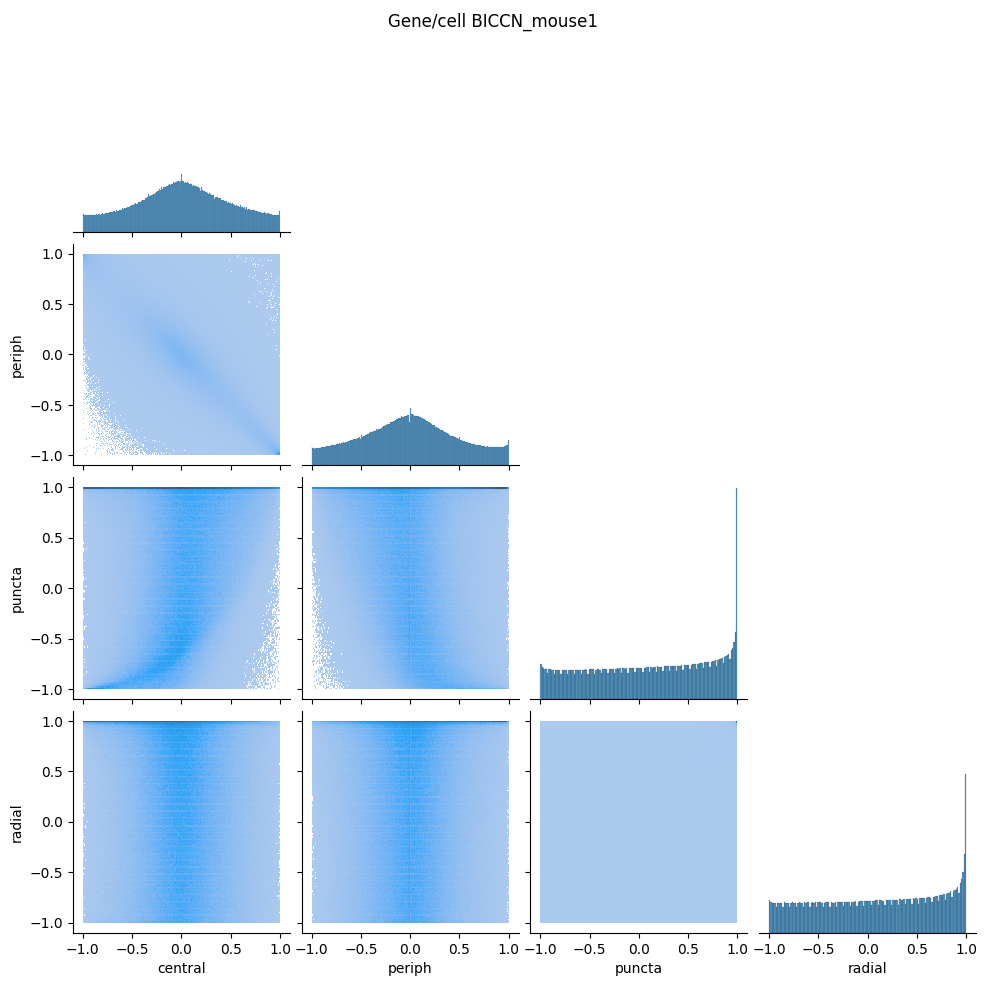

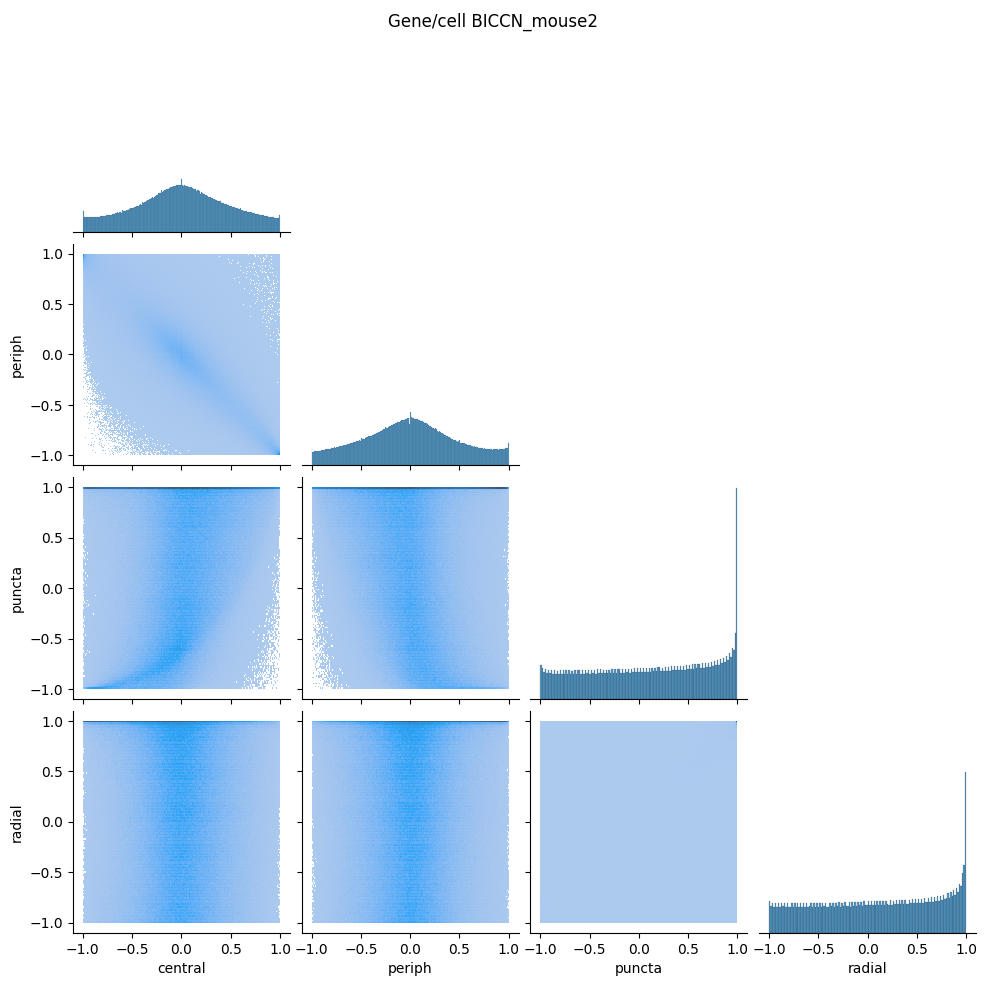

CPU times: user 1min 6s, sys: 14.7 s, total: 1min 21s
Wall time: 2min 39s


In [61]:
%%time
#pairplot metrics against each other, separately per mouse
pair_df = mop_df.pivot(
    index = ['experiment','gene','cell_id'],
    columns = 'metric',
    values = 'score',
).reset_index(level=0).reset_index(drop=True)

for exp,plot_df in pair_df.groupby('experiment'):
    sns.pairplot(data=plot_df, kind='hist', corner=True)
    plt.suptitle(f'Gene/cell {exp}')
    plt.show()
    plt.close()

# Vizgen Brainmap

In [26]:
#Read in all the Vizgen Brainmap gene/ont data (non-permuted)
paths = glob.glob('../../nf_pipeline/outputs/vz_Brainmap_20220602_direct/gene_ont/*.csv')
brainmap_df = pd.concat(pd.read_csv(p) for p in paths)
brainmap_df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
0,vz_Brainmap_slice1,s1r1,central,Abcc9,0,54,1.0,1061.5,-0.010530,-0.045420,0.963772,0.976495
1,vz_Brainmap_slice1,s1r1,central,Abcc9,1,72,1.0,981.0,-0.112644,-1.040364,0.298171,0.433658
2,vz_Brainmap_slice1,s1r1,central,Abcc9,2,47,1.0,992.0,0.105466,0.336410,0.736562,0.825557
3,vz_Brainmap_slice1,s1r1,central,Abcc9,3,20,1.0,1121.0,-0.136453,-1.524375,0.127415,0.223683
4,vz_Brainmap_slice1,s1r1,central,Abcc9,4,57,1.0,940.0,-0.019048,-0.005156,0.995886,0.996795
...,...,...,...,...,...,...,...,...,...,...,...,...
13592,vz_Brainmap_slice2,s2r1,periph,Xcr1,16,46,1.0,1105.0,0.211578,1.440696,0.149671,0.241666
13593,vz_Brainmap_slice2,s2r1,periph,Xcr1,20,41,1.0,1098.0,-0.019608,-0.350902,0.725662,0.808756
13594,vz_Brainmap_slice2,s2r1,periph,Xcr1,23,20,1.0,1023.0,0.011016,-0.321636,0.747728,0.825433
13595,vz_Brainmap_slice2,s2r1,periph,Xcr1,34,23,1.0,1039.0,-0.248899,-1.038598,0.298992,0.419588


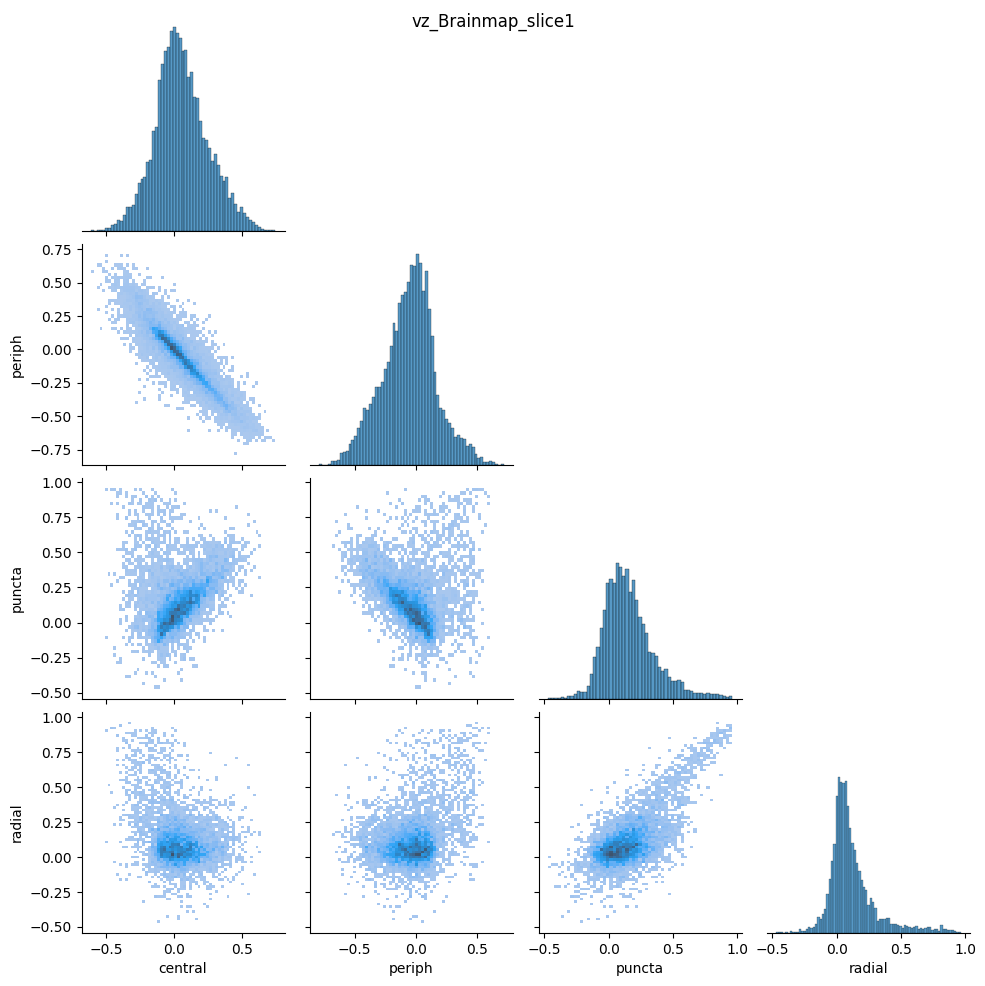

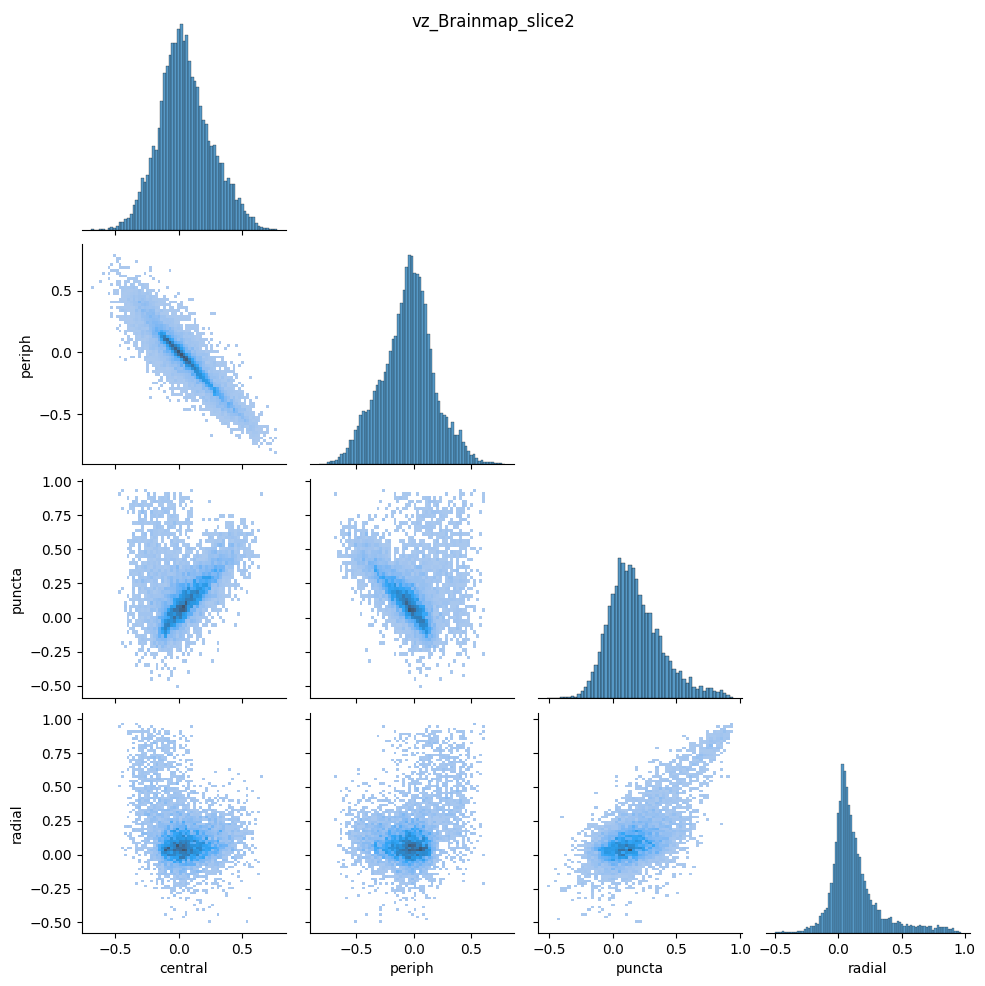

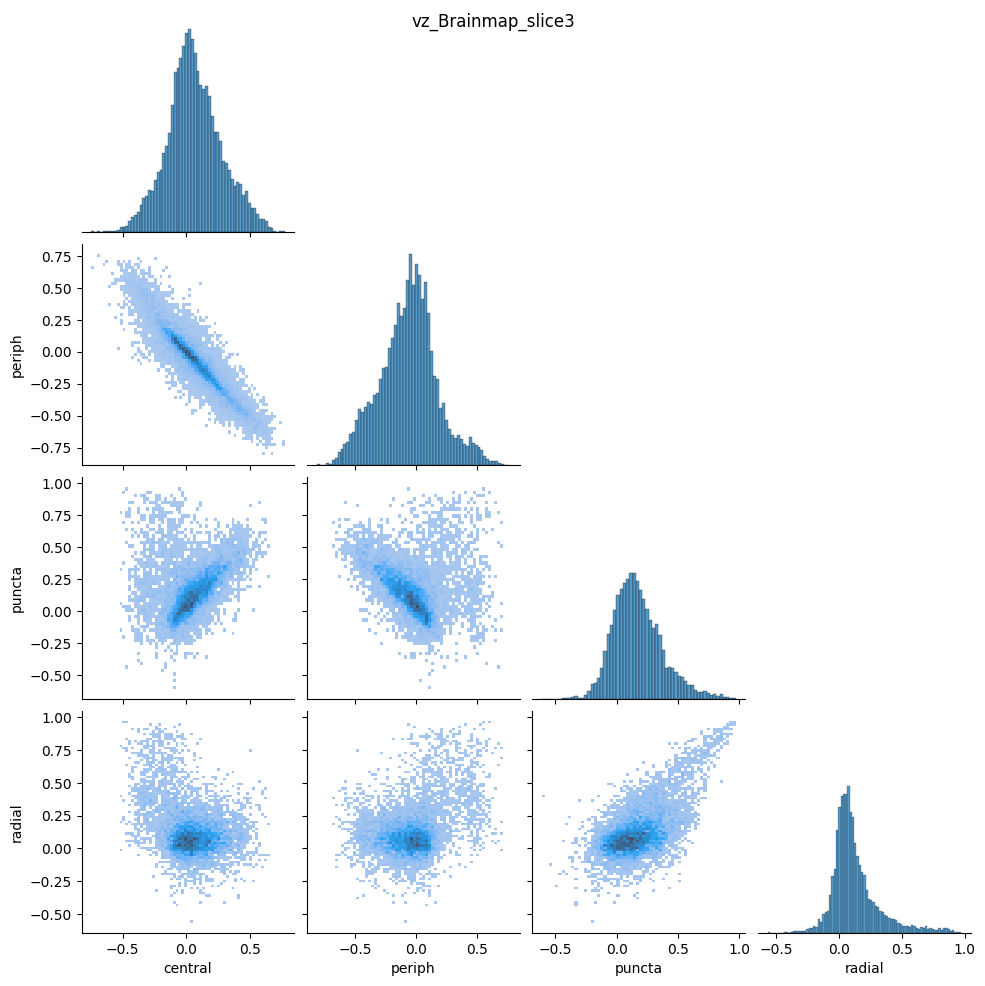

CPU times: user 6.34 s, sys: 384 ms, total: 6.73 s
Wall time: 17.2 s


In [27]:
%%time
#pairplot metrics against each other, separately per mouse
pair_df = brainmap_df.pivot(
    index = ['experiment','gene','annotation'],
    columns = 'metric',
    values = 'med_score',
).reset_index(level=0).reset_index(drop=True)

for exp,plot_df in pair_df.groupby('experiment'):
    sns.pairplot(data=plot_df, kind='hist', corner=True)
    plt.suptitle(f'{exp}')
    plt.show()
    plt.close()

# Vizgen Liver

In [55]:
paths = glob.glob('../../nf_pipeline/outputs/vz_Liver_20220601_direct/gene_ont/*.csv')
vz_liver_df = pd.concat(pd.read_csv(p) for p in paths)
vz_liver_df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
0,vz_Liver_mouse1,m1s2,central,Comt,0,49690,29.0,2065.0,-0.072866,-78.012094,0.000000e+00,0.000000e+00
1,vz_Liver_mouse1,m1s2,central,Comt,1,28283,21.0,1419.0,-0.075388,-49.284860,0.000000e+00,0.000000e+00
2,vz_Liver_mouse1,m1s2,central,Comt,2,21373,9.0,517.0,-0.037783,-15.044685,3.741116e-51,1.919289e-50
3,vz_Liver_mouse1,m1s2,central,Comt,3,23412,11.0,775.0,-0.087240,-41.328771,0.000000e+00,0.000000e+00
4,vz_Liver_mouse1,m1s2,central,Comt,4,23177,11.0,672.0,-0.063830,-30.349614,2.542138e-202,1.792344e-201
...,...,...,...,...,...,...,...,...,...,...,...,...
12611,vz_Liver_mouse2,m2s1,puncta,Blank-37,12,302,2.0,1734.5,0.034000,0.698774,4.846934e-01,6.104514e-01
12612,vz_Liver_mouse2,m2s1,puncta,Blank-37,13,52,2.0,869.5,0.093000,-0.422796,6.724440e-01,7.698254e-01
12613,vz_Liver_mouse2,m2s1,puncta,Blank-37,15,329,2.0,1989.0,-0.044000,-0.943464,3.454439e-01,4.745340e-01
12614,vz_Liver_mouse2,m2s1,puncta,Blank-37,16,210,2.0,1644.5,0.041000,0.399763,6.893311e-01,7.823499e-01


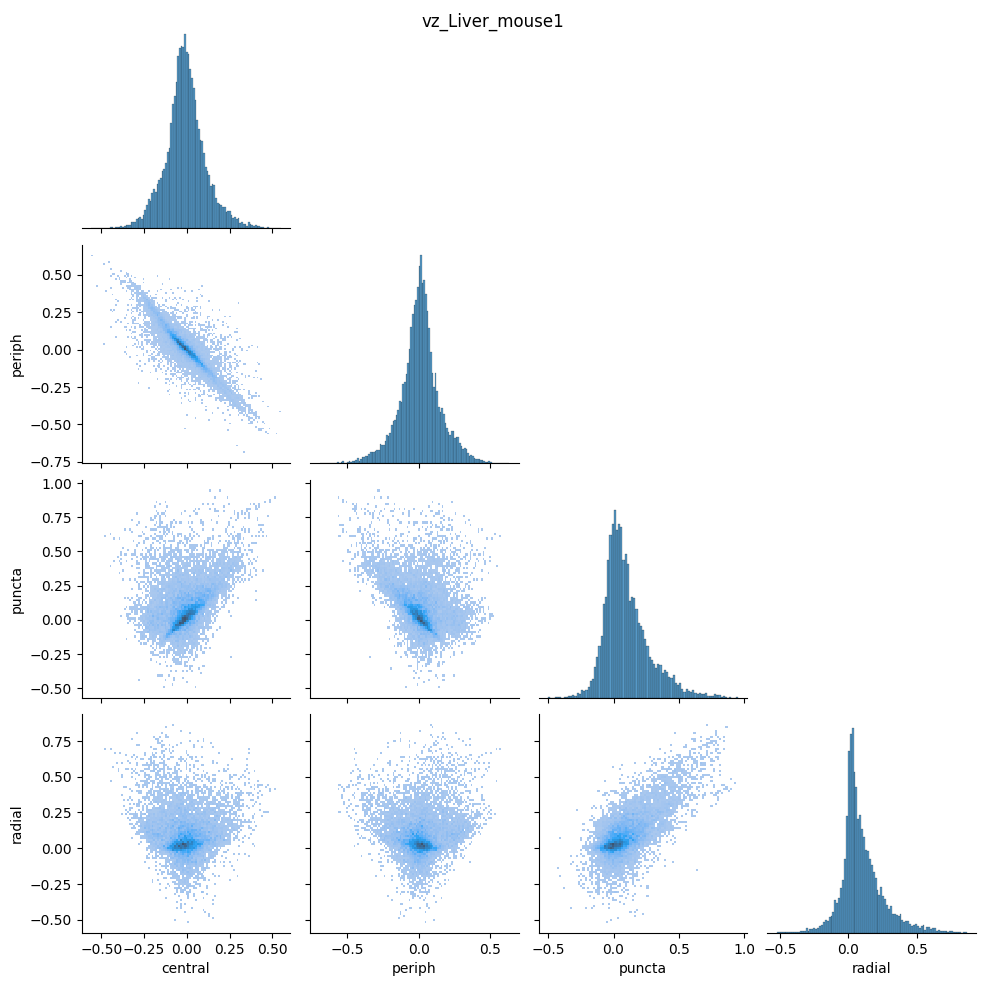

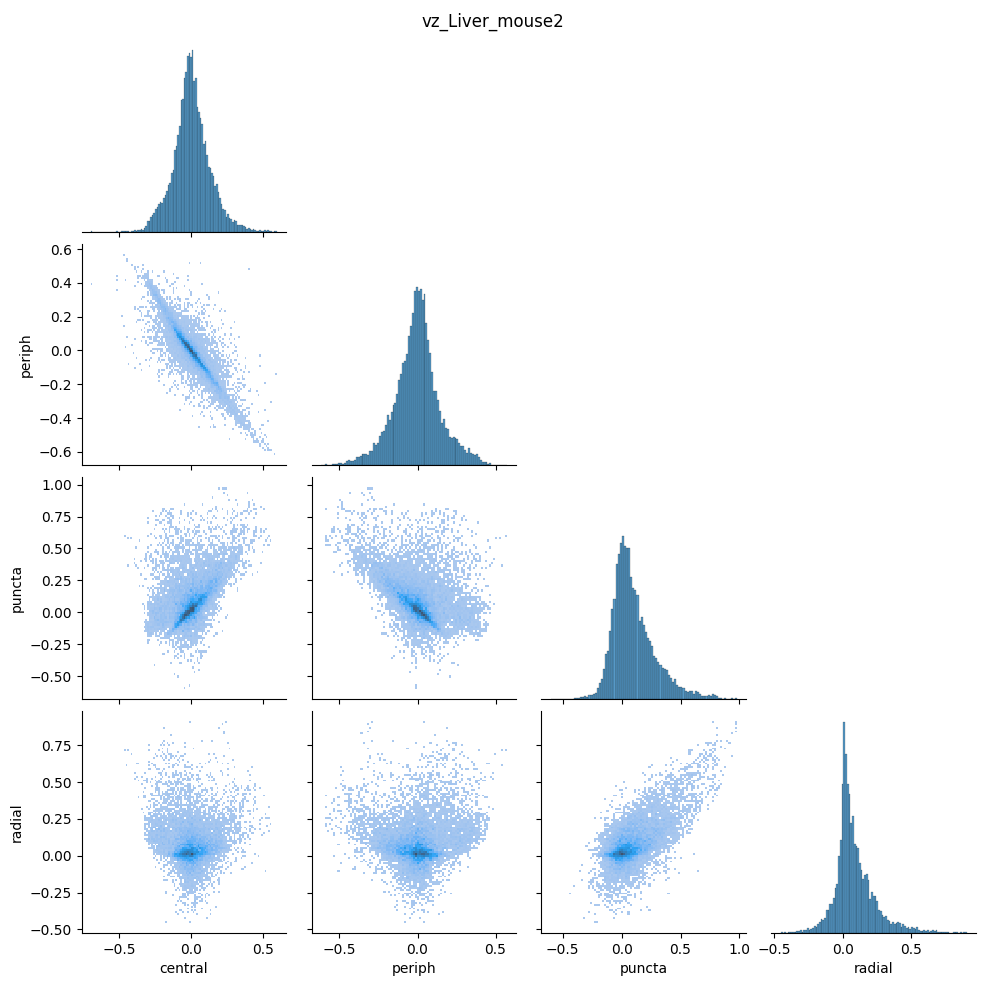

CPU times: user 4.64 s, sys: 314 ms, total: 4.96 s
Wall time: 29.2 s


In [56]:
%%time
#pairplot metrics against each other, separately per mouse
pair_df = vz_liver_df.pivot(
    index = ['experiment','gene','annotation'],
    columns = 'metric',
    values = 'med_score',
).reset_index(level=0).reset_index(drop=True)

for exp,plot_df in pair_df.groupby('experiment'):
    sns.pairplot(data=plot_df, kind='hist', corner=True)
    plt.suptitle(f'{exp}')
    plt.show()
    plt.close()

# CZB Kidney/Liver

In [51]:
paths = glob.glob('../../nf_pipeline/outputs/CZB_seqfish_20220728_direct/gene_ont/CZB*.csv')
czb_df = pd.concat(pd.read_csv(p) for p in paths)
czb_df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
0,CZB_liver,czb_liver,radial,ACE2,periportal hepatocyte,44,2.0,325.0,-0.100000,-0.206076,0.836732,0.929717
1,CZB_liver,czb_liver,radial,ACTN4,Kupffer cell,73,2.0,221.0,0.026000,0.516423,0.605559,0.796957
2,CZB_liver,czb_liver,radial,ACTN4,NK cell,31,3.0,245.0,-0.338000,-1.198970,0.230540,0.487108
3,CZB_liver,czb_liver,radial,ACTN4,hepatic stellate cell,105,4.0,203.0,-0.070000,-0.292807,0.769670,0.898713
4,CZB_liver,czb_liver,radial,ACTN4,other endothelial cell,53,2.0,195.0,0.198000,1.080008,0.280138,0.544126
...,...,...,...,...,...,...,...,...,...,...,...,...
1832,CZB_liver,czb_liver,periph,ZAP70,other hepatocyte,23,1.0,359.0,0.002469,-0.340731,0.733306,0.785013
1833,CZB_liver,czb_liver,periph,ZAP70,pericentral endothelial cell,26,1.0,345.0,0.106066,1.117724,0.263685,0.341600
1834,CZB_liver,czb_liver,periph,ZAP70,pericentral hepatocyte,153,1.0,316.0,-0.342975,-4.816307,0.000001,0.000005
1835,CZB_liver,czb_liver,periph,ZAP70,periportal hepatocyte,185,1.0,315.0,-0.070370,-1.664503,0.096012,0.141439


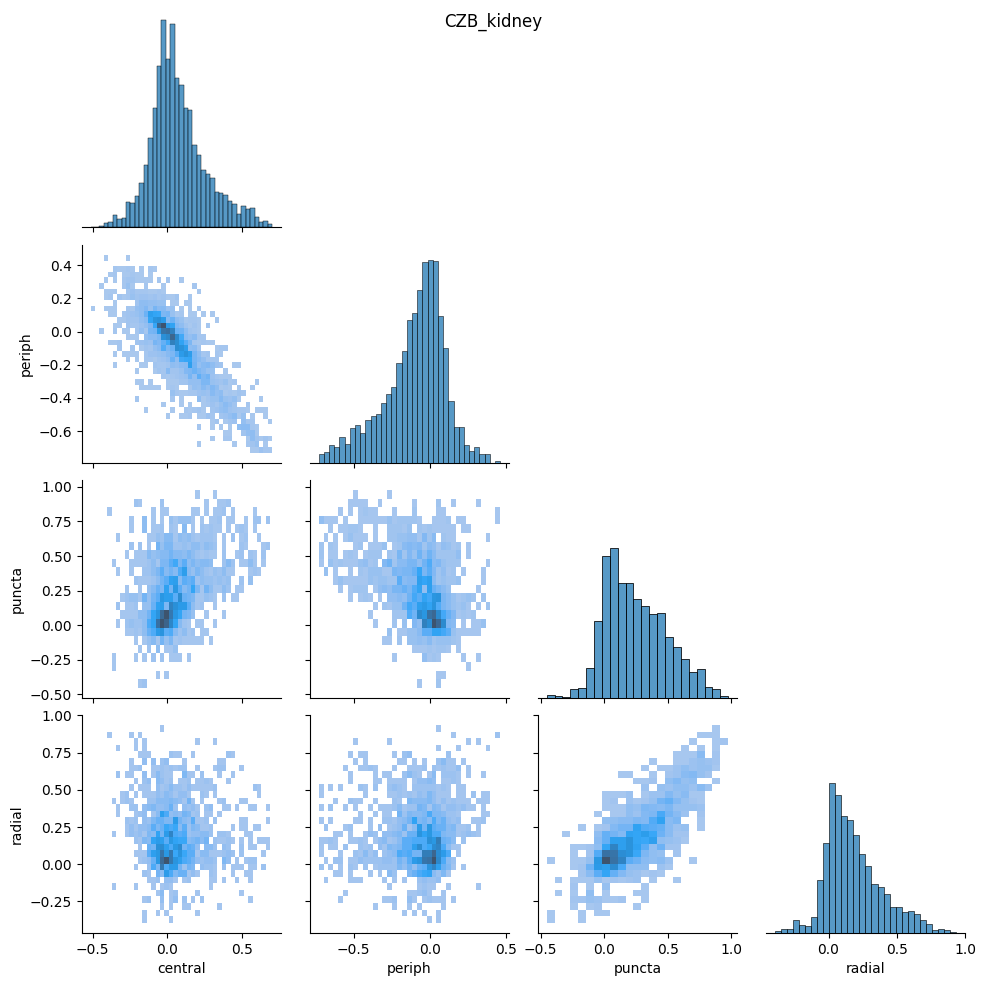

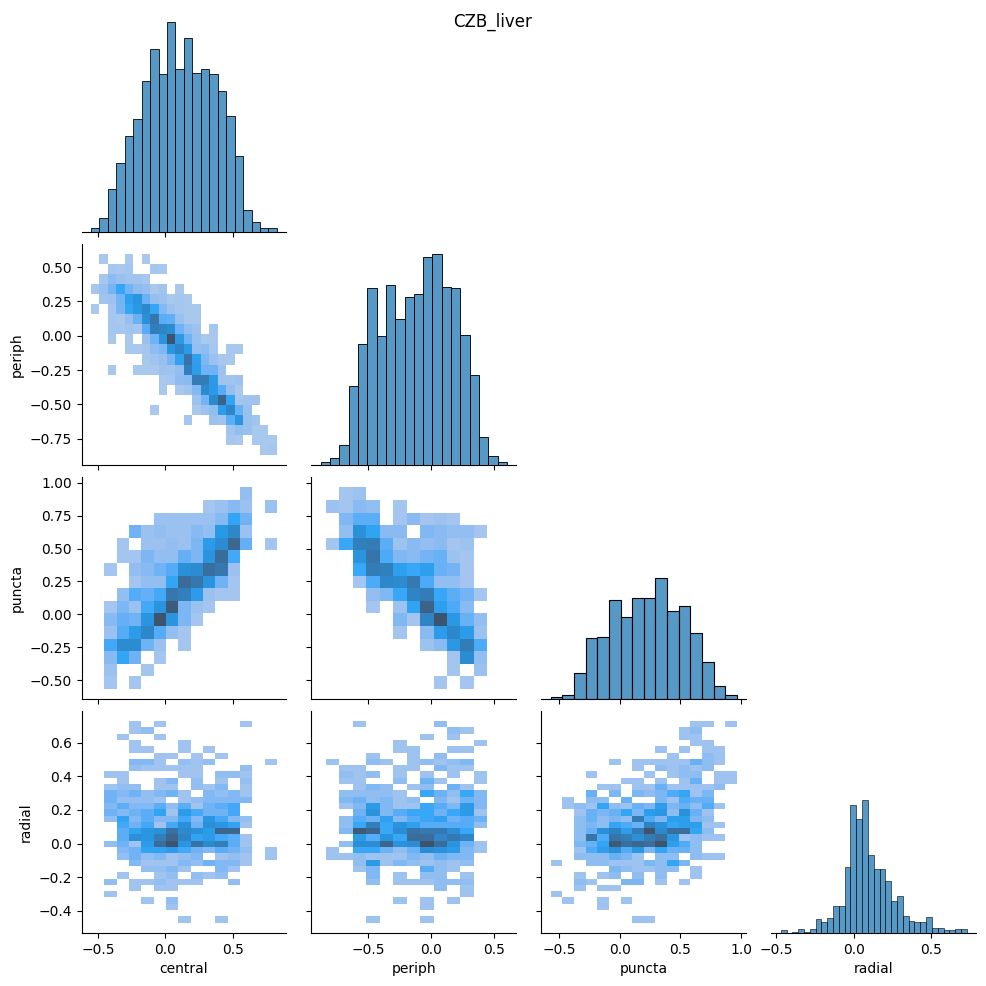

CPU times: user 3.17 s, sys: 189 ms, total: 3.36 s
Wall time: 3.36 s


In [52]:
%%time
#pairplot metrics against each other, separately per mouse
pair_df = czb_df.pivot(
    index = ['experiment','gene','annotation'],
    columns = 'metric',
    values = 'med_score',
).reset_index(level=0).reset_index(drop=True)

for exp,plot_df in pair_df.groupby('experiment'):
    sns.pairplot(data=plot_df, kind='hist', corner=True)
    plt.suptitle(f'{exp}')
    plt.show()
    plt.close()

# SeqFISH+

In [53]:
paths = glob.glob('../../nf_pipeline/outputs/CZB_seqfish_20220728_direct/gene_ont/seqfish*.csv')
seqfish_df = pd.concat(pd.read_csv(p) for p in paths)
seqfish_df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
0,seqfish,seqfish,periph,1700001l05rik,Excitatory layer 5/6,35,1.0,6134.0,0.025686,-0.986454,0.323910,0.828534
1,seqfish,seqfish,periph,1700022a21rik,Excitatory layer 3,25,1.0,6857.0,0.234320,1.706990,0.087824,0.597617
2,seqfish,seqfish,periph,1700022a21rik,Excitatory layer 5/6,32,1.0,6413.5,-0.034526,-0.258513,0.796011,0.967365
3,seqfish,seqfish,periph,1700025g04rik,Excitatory layer 5/6,35,1.0,6761.0,-0.228800,-1.261463,0.207142,0.738562
4,seqfish,seqfish,periph,1700042g15rik,Excitatory layer 5/6,40,1.0,5964.0,-0.340270,-2.032473,0.042106,0.473056
...,...,...,...,...,...,...,...,...,...,...,...,...
4555,seqfish,seqfish,radial,Znrf3,Excitatory layer 5/6,21,2.0,6280.0,-0.190000,0.520315,0.602844,0.979456
4556,seqfish,seqfish,radial,Zranb1,Excitatory layer 5/6,22,2.0,5294.0,0.063000,-0.109196,0.913047,0.994533
4557,seqfish,seqfish,radial,Zrsr1,Excitatory layer 5/6,23,2.0,4071.0,0.064000,1.185579,0.235789,0.950660
4558,seqfish,seqfish,radial,Zswim8,Excitatory layer 5/6,27,2.0,4394.0,0.170000,0.693973,0.487699,0.975978


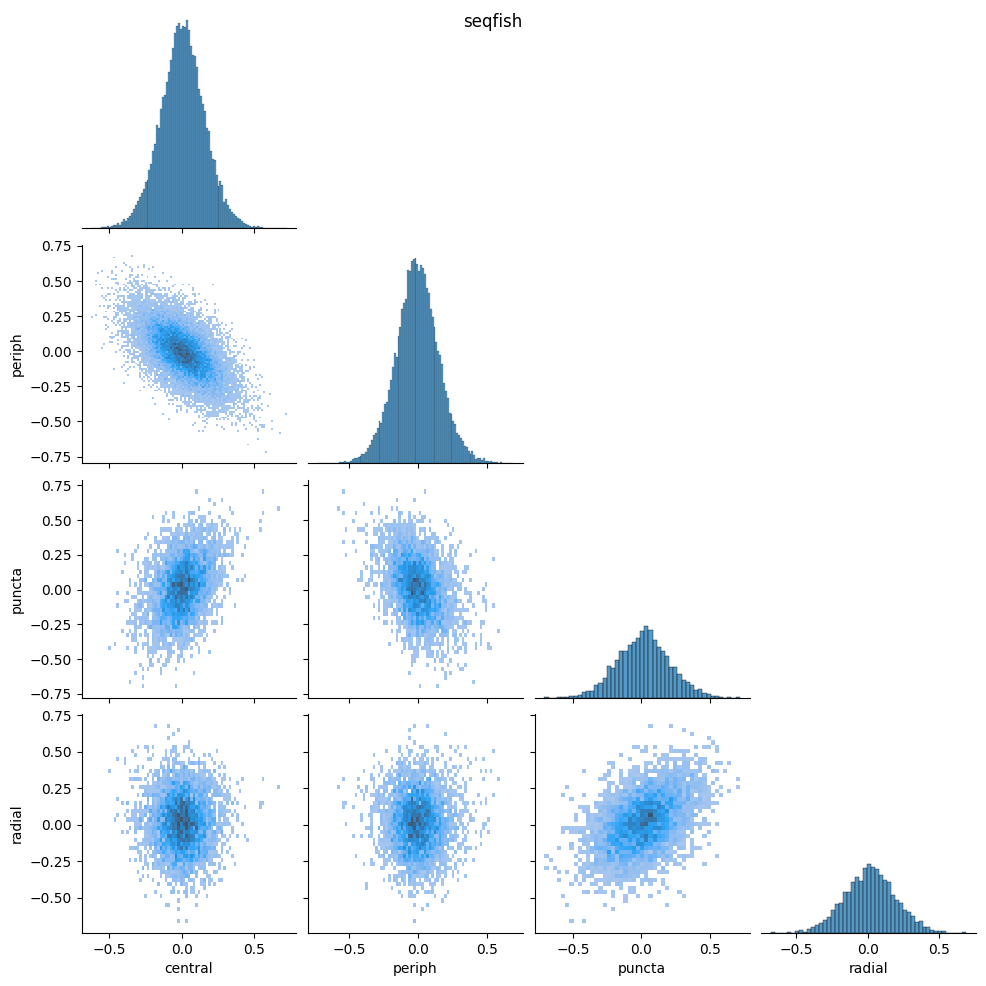

CPU times: user 1.96 s, sys: 116 ms, total: 2.08 s
Wall time: 2.09 s


In [54]:
%%time
#pairplot metrics against each other, separately per mouse
pair_df = seqfish_df.pivot(
    index = ['experiment','gene','annotation'],
    columns = 'metric',
    values = 'med_score',
).reset_index(level=0).reset_index(drop=True)

for exp,plot_df in pair_df.groupby('experiment'):
    sns.pairplot(data=plot_df, kind='hist', corner=True)
    plt.suptitle(f'{exp}')
    plt.show()
    plt.close()